In [29]:
%store -r nl_all
%store -r lob_all
%store -r leaves_all
%store -r ans

# Analysis

## Analysis: SVM

In [21]:
%matplotlib inline

import numpy as np
from numpy import random, nanmax, argmax, unravel_index
import cv2
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial import distance
from scipy.fftpack import fft, ifft
import statistics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from mpl_toolkits import mplot3d

In [7]:
# Calculates the following inputs:(1) PERIMETER, (X) AREA, (2) DIAMETER, (3) AREA / CONVEX HULL RATIO
# Convex hull = checks a curve for convexity defects and corrects it
def calc_diameter(contours):
    row_num = len(contours)
    # Unravels contours array to reshape it from row_num x 1 to row_num x 2
    a = np.reshape(np.ravel(contours), (row_num, 2))
    # Calculates a row_num x row_num matrix with the distances between all points
    d = np.sqrt(((a[:,None]-a[None,:])**2).sum(2))
    return np.amax(d);

def calc_convexHull(contours):
    hull = cv2.convexHull(contours)
    hull_area = cv2.contourArea(hull)
    #solidity = float(area)/hull_area
    return hull_area;

def calc_perimeter(contours):
    return cv2.arcLength(contours, True)
    
def calc_norm(funct, arr):
    dat = [0] * len(arr)
    for i in range(len(arr)):
        dat[i] = funct(arr[i])
    val = (dat - np.min(dat)) / np.ptp(dat)
    return val;

In [8]:
# Perimeter
all_perm = calc_norm(calc_perimeter, leaves_all)

In [9]:
# Area
all_area = calc_norm(cv2.contourArea, leaves_all)

In [10]:
# Diameter
all_diameter = calc_norm(calc_diameter, leaves_all)

In [11]:
# Area / Convex Hull
all_ach = []
for i in range(len(leaves_all)):
    ach = float(cv2.contourArea(leaves_all[i])) / calc_convexHull(leaves_all[i])
    all_ach.append(ach)

In [12]:
para = [all_perm, all_area, all_diameter, all_ach]
para_np = np.array(para)

In [13]:
len(leaves_all)
ans = np.empty((len(leaves_all), np.shape(para_np)[0]))
for i in range(len(leaves_all)):
    ans[i, :] = para_np[:,i]
# print(ans)

In [14]:
X = ans
y = [0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 
     0, 0,
     1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,
     1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 
     1, 1, 1]

err_term = 1
clf = svm.SVC(kernel = 'rbf', C = err_term, gamma = 1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
#print(clf.coef_)
y_pred = clf.predict(ans)
print(y_pred)
# print(np.count_nonzero(y_pred == 0))
# print(np.count_nonzero(y_pred == 1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 0]


In [16]:
cmat = confusion_matrix(y, y_pred)
print(cmat)

print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

[[27  0]
 [ 7 16]]
0.86
              precision    recall  f1-score   support

           0       0.79      1.00      0.89        27
           1       1.00      0.70      0.82        23

    accuracy                           0.86        50
   macro avg       0.90      0.85      0.85        50
weighted avg       0.89      0.86      0.86        50



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(len(X_train))
print(len(X_test))

37
13


In [18]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0.8461538461538461


In [19]:
clf = svm.SVC(kernel='rbf', C = 1, gamma = 'auto')
cv = ShuffleSplit(n_splits = 4, test_size = 0.25, random_state = 0)
scores = cross_val_score(clf, X, y, cv = cv)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.08)


In [20]:
# # Graphs the hyperplane and points for 2-3 inputs
# # Get the separating hyperplane
# w = clf.coef_[0]
# print(w)

# a = -w[0] / w[1]
# xx = np.linspace(0, .02)
# yy = a * xx - clf.intercept_[0] / w[1]

# h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

# x_pts = np.asarray(X)
# plt.scatter(x_pts[:, 0], x_pts[:, 1], c = y)
# plt.legend()
# plt.show()

## Analysis: PCA

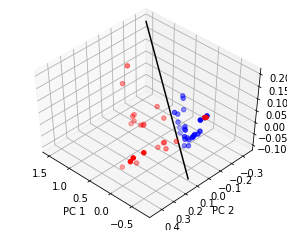

In [24]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# pca = decomposition.PCA(n_components=3)
# X = pca.transform(X)

pca = PCA(n_components = 3)
pca.fit(ans)
X = pca.transform(ans)
y = np.array([0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 
     0, 0,
     1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,
     1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 
     1, 1, 1])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c = 'b', label = "Non-lobed")
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c = 'r', label = "Lobed")

xlin = np.linspace(-.75, 1.5, 20)
ylin = -0.2*xlin - .03
zlin = np.linspace(-.1, .2, 20)
ax.plot(xlin, ylin, zlin, color = 'black')

plt.show()

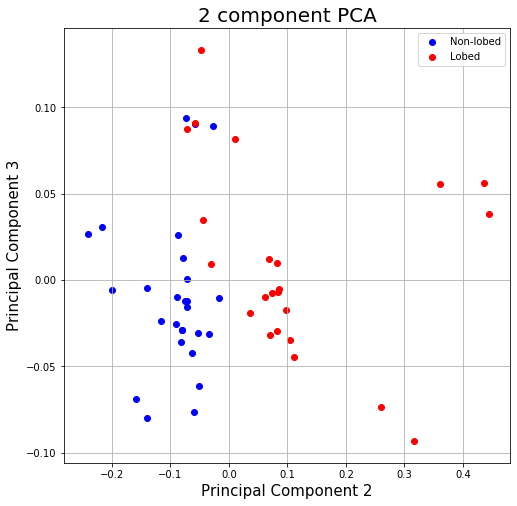

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# ax.scatter(X[:, 0], X[:, 1], c = y)
ax.scatter(X[y == 0, 1], X[y == 0, 2], c = 'b', label = "Non-lobed")
ax.scatter(X[y == 1, 1], X[y == 1, 2], c = 'r', label = "Lobed")

ax.legend()
ax.grid()

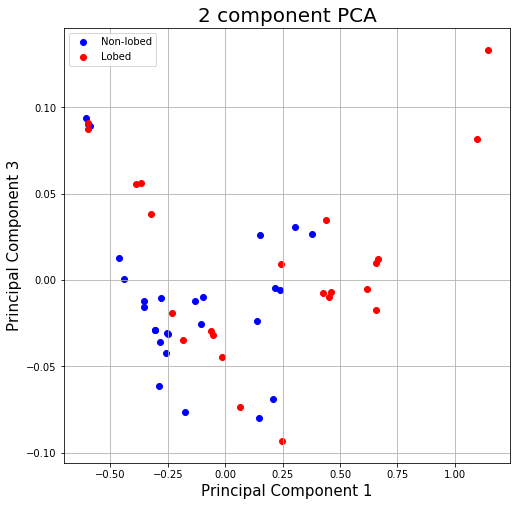

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# ax.scatter(X[:, 0], X[:, 1], c = y)
ax.scatter(X[y == 0, 0], X[y == 0, 2], c = 'b', label = "Non-lobed")
ax.scatter(X[y == 1, 0], X[y == 1, 2], c = 'r', label = "Lobed")

ax.legend()
ax.grid()

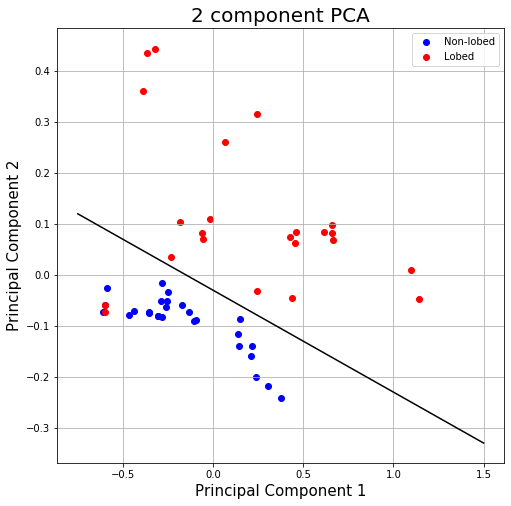

In [27]:
pca = PCA(n_components = 2)
pca.fit(ans)

X = pca.transform(ans)
y = np.array([0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0,
     0, 0, 0, 0, 0, 
     0, 0, 0, 0, 0, 
     0, 0,
     1, 1, 1, 1, 1, 
     1, 1, 1, 1, 1,
     1, 1, 1, 1, 1,
     1, 1, 1, 1, 1, 
     1, 1, 1])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# ax.scatter(X[:, 0], X[:, 1], c = y)
ax.scatter(X[y == 0, 0], X[y == 0, 1], c = 'b', label = "Non-lobed")
ax.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', label = "Lobed")

xlin = np.linspace(-.75, 1.5, 10)
ylin = -0.2*xlin - .03  
ax.plot(xlin, ylin, color = 'black')

ax.legend()
ax.grid()

In [28]:
# print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.87721307 0.10478037]
[3.03052925 1.04738388]
